# Optimizing RandomForest1
- New Hyper Parameters used for user type classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

import my_scoring_functions as msf

%matplotlib inline

# Setting up Data (subscriber as class=0)

In [2]:
d2013 = pd.read_csv('../data/for_predictions/2013_membership_pred.csv')
d2014 = pd.read_csv('../data/for_predictions/2014_membership_pred.csv')
d2015 = pd.read_csv('../data/for_predictions/2015_membership_pred.csv')
d2016 = pd.read_csv('../data/for_predictions/2016_membership_pred.csv')
d2017 = pd.read_csv('../data/for_predictions/2017_membership_pred.csv')

In [6]:
data = pd.concat([d2013, d2014, d2015, d2016, d2017], axis=0)
data = data.dropna()
del data['gender']

In [7]:
data.columns

Index(['tripduration', 'start station latitude', 'start station longitude',
       'end station latitude', 'end station longitude', 'start_year',
       'start_month', 'start_day', 'start_hour', 'start_dayofweek',
       'usertype'],
      dtype='object')

In [8]:
data.head()

,tripduration,start station latitude,start station longitude,end station latitude,end station longitude,start_year,start_month,start_day,start_hour,start_dayofweek,usertype
0,634,40.753231,-73.970325,40.732219,-73.981656,2013,7,1,0,0,Customer
1,1547,40.749718,-74.002950,40.746745,-74.007756,2013,7,1,0,0,Customer
2,178,40.730287,-73.990765,40.730473,-73.986724,2013,7,1,0,0,Subscriber
3,1580,40.718939,-73.992663,40.769155,-73.981918,2013,7,1,0,0,Customer
4,757,40.734927,-73.992005,40.720664,-73.985180,2013,7,1,0,0,Subscriber


In [9]:
data.describe().round(0)

,tripduration,start station latitude,start station longitude,end station latitude,end station longitude,start_year,start_month,start_day,start_hour,start_dayofweek
count,39096233.0,39096233.0,39096233.0,39096233.0,39096233.0,39096233.0,39096233.0,39096233.0,39096233.0,39096233.0
mean,920.0,41.0,-74.0,41.0,-74.0,2015.0,7.0,16.0,14.0,3.0
std,7616.0,0.0,0.0,0.0,0.0,1.0,3.0,9.0,5.0,2.0
min,60.0,0.0,-74.0,0.0,-74.0,2013.0,1.0,1.0,0.0,0.0
25%,385.0,41.0,-74.0,41.0,-74.0,2014.0,5.0,8.0,10.0,1.0
50%,623.0,41.0,-74.0,41.0,-74.0,2015.0,8.0,16.0,15.0,3.0
75%,1042.0,41.0,-74.0,41.0,-74.0,2016.0,10.0,23.0,18.0,4.0
max,8933552.0,41.0,0.0,41.0,0.0,2017.0,12.0,31.0,23.0,6.0


In [10]:
# Store name of the features for later use
feature_labels = data.columns[:-1]

In [11]:
# Create X and y for sklearn
X = data[data.columns[:-1]].astype(np.float)
y = (data['usertype'] == 'Customer').values.astype(np.int)

In [12]:
# Clear memory
data = None

# RandomForest with New Hyperparameters

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [14]:
%%time
clf = RandomForestClassifier(n_jobs=4, max_depth=40, n_estimators=50)
clf.fit(X_train, y_train)

CPU times: user 4h 27min 12s, sys: 2min 5s, total: 4h 29min 18s
Wall time: 1h 9min 52s


In [15]:
%%time
results = msf.score_clf2(clf, X_test, y_test, X_train=X_train, y_train=y_train)

CPU times: user 1h 8min 23s, sys: 5min 57s, total: 1h 14min 21s
Wall time: 32min 15s


==== Random Forest Metrics on Test Set ====
Accuracy: 0.928107
Precision: 0.792980
Recall: 0.483477
F-Score: 0.600706
Brier Score: 0.057339
Average Precision Score: 0.687343
Confusion Matrix:  [[13668478   220786]
 [  903518   845712]]
==== Random Forest Metrics on Train Set ====
Accuracy: 0.999091
Precision: 0.999778
Recall: 0.992091
F-Score: 0.995920
Brier Score: 0.008845
Average Precision Score: 0.999984
Confusion Matrix:  [[20833841      578]
 [   20748  2602572]]
--------------- Feature Importances ---------------
 1) tripduration         0.258615
 2) start station latitude 0.112903
 3) end station latitude 0.110043
 4) start station longitude 0.102351
 5) end station longitude 0.100277
 6) start_day            0.088932
 7) start_hour           0.084764
 8) start_dayofweek      0.061735
 9) start_month          0.052773
10) start_year           0.027609




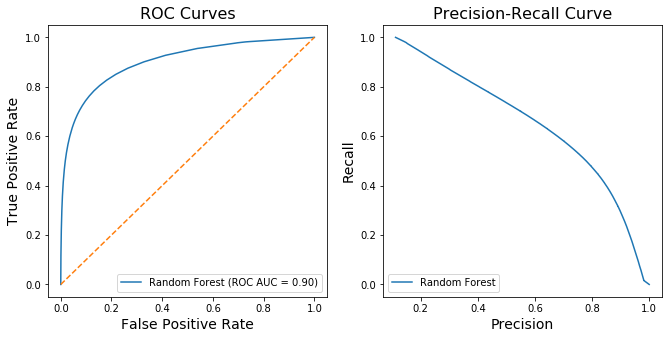

In [16]:
clf_name = 'Random Forest'

msf.print_clf_scores2(results, trainset=True, clf_name=clf_name, feature_labels=feature_labels)

# Get ROCC_curve data
fpr = results['scores']['roc_curve'][0]
tpr = results['scores']['roc_curve'][1]
roc_auc = results['scores']['roc_auc']

# Precision-Recall Curve to be implemented here
prec = results['scores']['pr_curve'][0]
rec = results['scores']['pr_curve'][1]      

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))

x = np.linspace(0, 1, 10)
y = np.linspace(0, 1, 10)  
ax1.plot(fpr, tpr, ls='-', label='%s (ROC AUC = %0.2f)' % (clf_name, roc_auc))
ax1.plot(x, y, ls='--')
ax1.set_title('ROC Curves', fontsize=16)
ax1.set_xlabel('False Positive Rate', fontsize=14)
ax1.set_ylabel('True Positive Rate', fontsize=14)
ax1.legend(loc='lower right')

ax2.plot(prec, rec, label='%s' % clf_name)
ax2.set_title('Precision-Recall Curve', fontsize=16)
ax2.set_xlabel('Precision', fontsize=14)
ax2.set_ylabel('Recall', fontsize=14)
ax2.legend(loc='lower left')                             